### Discussed with Wilshire

In [47]:
import keras 
from keras.datasets import mnist 
(train_X , train_Y) , (test_X, test_Y) = mnist.load_data () 
train_X = train_X.astype ('float32') 
test_X = test_X.astype ('float32')

In [48]:
print(len(train_Y[train_Y==3]))
print(len(train_Y[train_Y==5]))
print(len(test_Y[test_Y==3]))
print(len(test_Y[test_Y==5]))

6131
5421
1010
892


In [49]:
# Randomly choose 1000 digit 3 and 1000 digit 5 for training, and another 500 digit 3 and 500 digit 5 for testing.
import random
train_index_1 = random.sample(range(1, len(train_Y[train_Y==3])), 1000)
train_index_2 = random.sample(range(1, len(train_Y[train_Y==5])), 1000)
test_index_1 = random.sample(range(1, len(test_Y[test_Y==3])), 500)
test_index_2 = random.sample(range(1, len(test_Y[test_Y==5])), 500)

In [50]:
import numpy as np
print(np.where(train_Y == 3))
print(np.where(train_Y == 5))

(array([    7,    10,    12, ..., 59978, 59980, 59996], dtype=int64),)
(array([    0,    11,    35, ..., 59968, 59993, 59997], dtype=int64),)


In [51]:
train_index = list(np.where(train_Y == 3)[0][train_index_1]) + list(np.where(train_Y == 5)[0][train_index_2])
test_index = list(np.where(test_Y == 3)[0][test_index_1]) + list(np.where(test_Y == 5)[0][test_index_2])
print(len(train_index))
print(len(test_index))

2000
1000


In [52]:
training_X = train_X[train_index]
training_Y = train_Y[train_index]
testing_X = test_X[test_index]
testing_Y = test_Y[test_index]

## Q1: Run logistic regression to obtain the training and testing classiﬁcation accuracy on the raw pixel values (each digit is represented by a 28×28 = 784 dimensional vector)

In [53]:
training_X = training_X.reshape(2000,-1)
testing_X = testing_X.reshape(1000,-1)

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(training_X, training_Y)
print("Training classiﬁcation accuracy is "+ str(lr.score(training_X, training_Y)))
print("Testing classiﬁcation accuracy is "+ str(lr.score(testing_X, testing_Y)))

Training classiﬁcation accuracy is 1.0
Testing classiﬁcation accuracy is 0.953


## Q2: Use PCA to linearly project the data into a K-dimensional space that provides the smallest data reconstruction error, where K = 2,5,10,20,50,100,200. Using the K-dimensional latent representation as the features for logistic regression, plot the training and testing classiﬁcation accuracy against K. Describe the trend and explain.

In [55]:
from sklearn import decomposition
klist = [2,5,10,20,50,100,200]
train_acc = []
test_acc = []
for k in klist:
    pca = decomposition.PCA()
    pca.n_components = k
    pca_data_train = pca.fit_transform(training_X)
    pca_data_test = pca.transform(testing_X)
    lr = LogisticRegression(random_state=0).fit(pca_data_train, training_Y)
    train_acc.append(lr.score(pca_data_train, training_Y))
    test_acc.append(lr.score(pca_data_test, testing_Y))

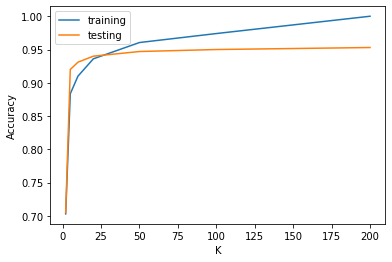

In [56]:
import matplotlib.pyplot as plt
plt.plot(klist,train_acc, label = 'training')
plt.plot(klist,test_acc,label = 'testing')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="best")

### Training accuracy keeps increasing and is close to 1 as k increases. The test accuracy, on the other hand, becomes lower as k increases which means we have an overfitting issue. 

## Q3: Project the digits into a 2-dimensional space (using PCA), and see whether the digits from different classes are well separated in the projected space.

In [57]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data_train = pca.fit_transform(training_X)

In [58]:
import pandas as pd
dataframe = pd.DataFrame(data=pca_data_train, columns=("1st_principal", "2nd_principal"))
dataframe['label']= 3
dataframe['label'][1000:] = 5
print(dataframe.tail())

1st_principal  2nd_principal  label
1995     522.648193    -115.477623      5
1996    -236.468262    -973.649841      5
1997    1139.913818    -361.667297      5
1998    -609.736816     244.530289      5
1999    1288.875977      11.767682      5


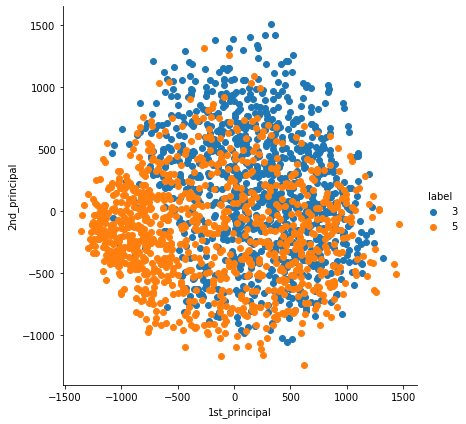

In [59]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Digits three and five are not well seperated in the projected space since there have lots of overlap space.

## Q4: Project the digits into 2-dimensional space using Kernel PCA, Local Linear Embedding and t-SNE, and compare the results with PCA.

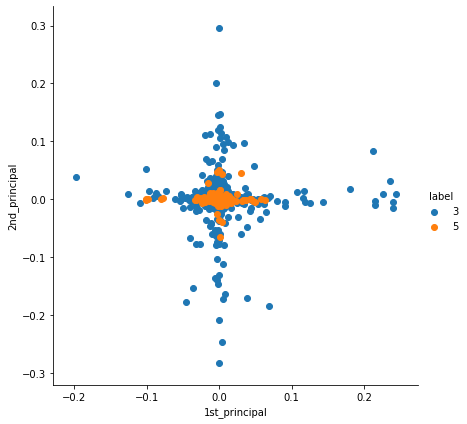

In [43]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
kpca_data_train = kpca.fit_transform(training_X)
dataframe_kpca = pd.DataFrame(data=kpca_data_train, columns=("1st_principal", "2nd_principal"))
dataframe_kpca['label']= 3
dataframe_kpca['label'][1000:] = 5
sn.FacetGrid(dataframe_kpca, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

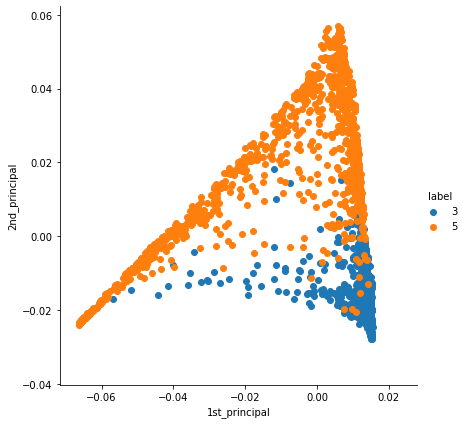

In [44]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2)
local_linear = embedding.fit_transform(training_X)
dataframe_local = pd.DataFrame(data=local_linear, columns=("1st_principal", "2nd_principal"))
dataframe_local['label']= 3
dataframe_local['label'][1000:] = 5
sn.FacetGrid(dataframe_local, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

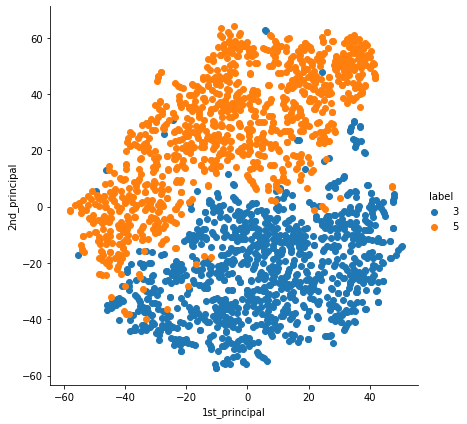

In [45]:
from sklearn.manifold import TSNE
tsne_embedding = TSNE(n_components=2)
tsne = tsne_embedding.fit_transform(training_X)
dataframe_tsne = pd.DataFrame(data=tsne, columns=("1st_principal", "2nd_principal"))
dataframe_tsne['label']= 3
dataframe_tsne['label'][1000:] = 5
sn.FacetGrid(dataframe_tsne, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### It looks like we have a much better seperation using Kernel PCA, Local Linear Embedding or t-SNE.

## Q5: Randomly sample 1000 data from MNIST, and apply Probablistic PCA (PPCA). After convergence, randomly sample a noise z ∼ N(0,I) to generate a random sample X ∼ N(Wz,σ2I), where W and σ can be obtained from the ppca attributes. Display 100 randomly generated samples and see if they resemble real digits. Explain why or why not.


In [16]:
# Pick 1000 random data from MNIST
random_index = random.sample(range(1, len(train_Y)), 1000)
xtrain = train_X[random_index]
xtrain = xtrain.reshape(1000,-1)
ytrain = train_Y[random_index]

In [17]:
import ppca
ppca = ppca.PPCA(D=2, n_iters=30 , verbose = True)
ppca.fit(xtrain)

Lower bound: -4999757.820138861
0
Lower bound: -4544007.6854260545
1
Lower bound: -4422982.73203105
2
Lower bound: -4414508.836869635
3
Lower bound: -4412739.291311759
4
Lower bound: -4411884.320180174
5
Lower bound: -4411405.7183915125
6
Lower bound: -4411105.112345698
7
Lower bound: -4410887.364644002
8
Lower bound: -4410704.348024825
9
Lower bound: -4410531.057827517
10
Lower bound: -4410354.495091425
11
Lower bound: -4410168.439470973
12
Lower bound: -4409971.002190814
13
Lower bound: -4409763.415556171
14
Lower bound: -4409549.251888949
15
Lower bound: -4409333.671308976
16
Lower bound: -4409122.570283
17
Lower bound: -4408921.692796562
18
Lower bound: -4408735.860813796
19
Lower bound: -4408568.471354239
20
Lower bound: -4408421.323207101
21
Lower bound: -4408294.7356000105
22
Lower bound: -4408187.855277642
23
Lower bound: -4408099.035049971
24
Lower bound: -4408026.19260676
25
Lower bound: -4407967.098560039
26
Lower bound: -4407919.578197959
27
Lower bound: -4407881.634056647


In [60]:
sigma_square = ppca.e_tau
w = ppca.e_w
z = np.random.multivariate_normal((0,0), np.eye(2))

In [61]:
final_sample = []
for i in range(100):
    z = np.random.multivariate_normal((0,0), np.eye(2))
    X = np.random.multivariate_normal(np.dot(w, z), sigma_square*np.eye(784)).reshape(28,28)
    final_sample.append(X)

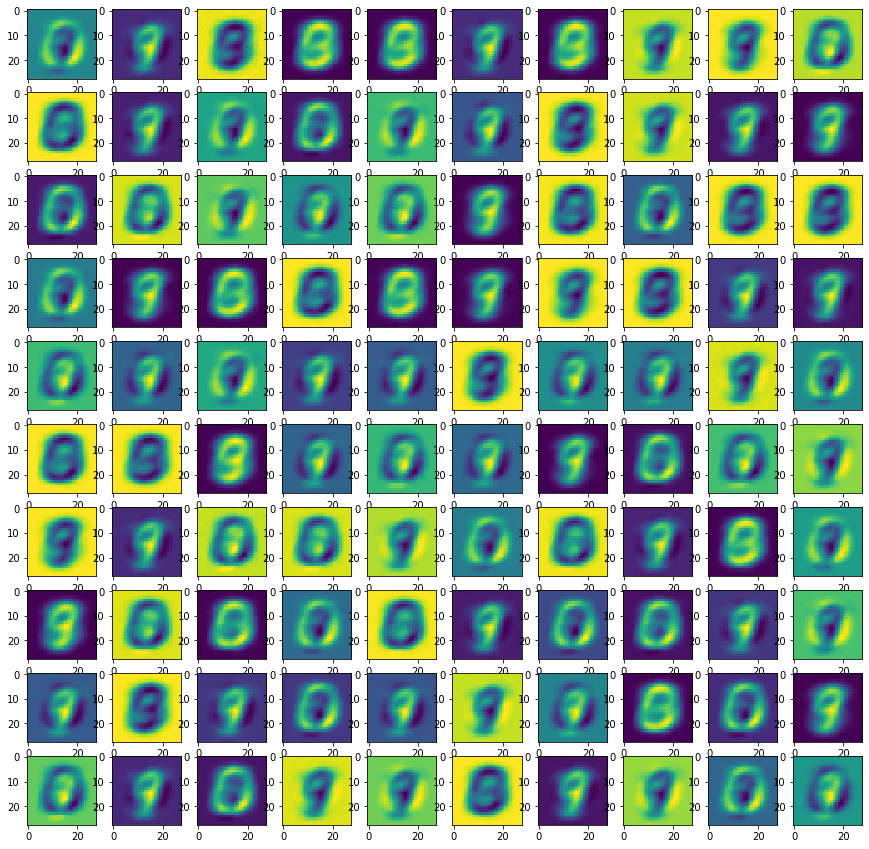

In [62]:
_, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()
for img, ax in zip(final_sample, axs):
    ax.imshow(img)
plt.show()

### The generated samples are not as good as digits from mnist but still, you can recognize which number each sample graph represents. I guess the reason it is not that good is we set k = 2, so it captures part of the variance or charactersitics of the original digits data, if we increase k to a larger number like 5 or 7, it should look better.